# Call Center Data - Exploratory Data Analysis

This notebook performs comprehensive EDA on the call center dataset to understand patterns, trends, and relationships in the data.

## 1. Import Libraries

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Set style for better-looking plots
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

# Display settings
pd.set_option("display.max_columns", None)
pd.set_option("display.precision", 2)

## 2. Load Data

In [4]:
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
call_data = "../data/raw/call-center-data-v2-daily.csv"
df = pd.read_csv(call_data, parse_dates=["Date"])

In [6]:
df.set_index("Date", inplace=True)

In [7]:
time_cols = ["Answer Speed (AVG)", "Talk Duration (AVG)", "Waiting Time (AVG)"]
for col in time_cols:
    df[col] = pd.to_timedelta(df[col]).dt.total_seconds()

## 2.1 Data Validation & Quality Checks

Ensure data quality for time series analysis:

In [8]:
# ============================================================
# 1. Verify Datetime Format
# ============================================================
print("=" * 60)
print("1. DATETIME FORMAT VALIDATION")
print("=" * 60)
print(f"Index type: {type(df.index)}")
print(f"Index dtype: {df.index.dtype}")
print(f"Is DatetimeIndex: {isinstance(df.index, pd.DatetimeIndex)}")
print(f"\nFirst date: {df.index[0]}")
print(f"Last date: {df.index[-1]}")
print(f"Date range: {(df.index[-1] - df.index[0]).days} days")

# ============================================================
# 2. Check Chronological Order
# ============================================================
print("\n" + "=" * 60)
print("2. CHRONOLOGICAL ORDER CHECK")
print("=" * 60)
is_sorted = df.index.is_monotonic_increasing
print(f"Data is sorted chronologically: {is_sorted}")

if not is_sorted:
    print("⚠️ WARNING: Data is NOT sorted chronologically!")
    print("Sorting data by date...")
    df.sort_index(inplace=True)
    print("✓ Data has been sorted")
else:
    print("✓ Data is properly sorted")

# ============================================================
# 3. Check for Missing Timestamps (Gaps in Date Sequence)
# ============================================================
print("\n" + "=" * 60)
print("3. MISSING TIMESTAMPS CHECK")
print("=" * 60)

# Create a complete date range
date_range = pd.date_range(start=df.index.min(), end=df.index.max(), freq="D")
missing_dates = date_range.difference(df.index)

print(f"Expected dates (daily): {len(date_range)}")
print(f"Actual dates in dataset: {len(df.index)}")
print(f"Missing dates: {len(missing_dates)}")

if len(missing_dates) > 0:
    print(f"\n⚠️ WARNING: Found {len(missing_dates)} missing dates:")
    print(missing_dates.tolist()[:10])  # Show first 10 missing dates
    if len(missing_dates) > 10:
        print(f"... and {len(missing_dates) - 10} more")
else:
    print("✓ No missing dates - complete daily sequence")

# ============================================================
# 4. Check for Duplicate Entries
# ============================================================
print("\n" + "=" * 60)
print("4. DUPLICATE ENTRIES CHECK")
print("=" * 60)

duplicate_dates = df.index.duplicated()
num_duplicates = duplicate_dates.sum()

print(f"Duplicate dates found: {num_duplicates}")

if num_duplicates > 0:
    print(f"\n⚠️ WARNING: Found {num_duplicates} duplicate dates:")
    print(df.index[duplicate_dates].tolist())
    print("\nDuplicate rows:")
    print(df[duplicate_dates])
else:
    print("✓ No duplicate dates")

# ============================================================
# 5. Confirm Granularity (Daily Frequency)
# ============================================================
print("\n" + "=" * 60)
print("5. GRANULARITY CHECK")
print("=" * 60)

# Calculate time differences between consecutive dates
time_diffs = df.index.to_series().diff()
unique_diffs = time_diffs.value_counts().sort_index()

print("Time differences between consecutive dates:")
print(unique_diffs)

most_common_diff = time_diffs.mode()[0]
print(f"\nMost common time difference: {most_common_diff}")
print("Expected for daily data: 1 day")

if most_common_diff == pd.Timedelta(days=1):
    print("✓ Data granularity confirmed: DAILY")
else:
    print(f"⚠️ WARNING: Unexpected granularity - most common gap is {most_common_diff}")

# Check inferred frequency
inferred_freq = pd.infer_freq(df.index)
print(f"\nInferred frequency: {inferred_freq}")
if inferred_freq is None:
    print("⚠️ WARNING: Could not infer a consistent frequency (may have gaps or irregularities)")

# ============================================================
# 6. Data Type Verification for All Columns
# ============================================================
print("\n" + "=" * 60)
print("6. DATA TYPES VERIFICATION")
print("=" * 60)
print("\nColumn data types:")
print(df.dtypes)

print("\n" + "=" * 60)
print("VALIDATION SUMMARY")
print("=" * 60)
print(f"✓ Datetime index: {isinstance(df.index, pd.DatetimeIndex)}")
print(f"✓ Chronologically sorted: {df.index.is_monotonic_increasing}")
print(f"✓ No missing timestamps: {len(missing_dates) == 0}")
print(f"✓ No duplicate entries: {num_duplicates == 0}")
print(f"✓ Daily granularity: {most_common_diff == pd.Timedelta(days=1)}")
print("=" * 60)

1. DATETIME FORMAT VALIDATION
Index type: <class 'pandas.core.indexes.datetimes.DatetimeIndex'>
Index dtype: datetime64[ns]
Is DatetimeIndex: True

First date: 2022-01-01 00:00:00
Last date: 2025-05-31 00:00:00
Date range: 1246 days

2. CHRONOLOGICAL ORDER CHECK
Data is sorted chronologically: True
✓ Data is properly sorted

3. MISSING TIMESTAMPS CHECK
Expected dates (daily): 1247
Actual dates in dataset: 1247
Missing dates: 0
✓ No missing dates - complete daily sequence

4. DUPLICATE ENTRIES CHECK
Duplicate dates found: 0
✓ No duplicate dates

5. GRANULARITY CHECK
Time differences between consecutive dates:
Date
1 days    1246
Name: count, dtype: int64

Most common time difference: 1 days 00:00:00
Expected for daily data: 1 day
✓ Data granularity confirmed: DAILY

Inferred frequency: D

6. DATA TYPES VERIFICATION

Column data types:
Incoming Calls           int64
Answered Calls           int64
Abandoned Calls          int64
Answer Speed (AVG)     float64
Talk Duration (AVG)    float64

## 3. Basic Dataset Information

In [9]:
# Dataset shape
print(f"Dataset shape: {df.shape}")
print(f"Number of records: {df.shape[0]}")
print(f"Number of features: {df.shape[1]}")
print(f"\nDate range: {df.index.min()} to {df.index.max()}")
print(f"Total days: {(df.index.max() - df.index.min()).days} days")

Dataset shape: (1247, 6)
Number of records: 1247
Number of features: 6

Date range: 2022-01-01 00:00:00 to 2025-05-31 00:00:00
Total days: 1246 days


In [10]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())
print(f"\nTotal missing values: {df.isnull().sum().sum()}")
print(f"Percentage of missing data: {(df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100):.2f}%")

Missing Values:
Incoming Calls         0
Answered Calls         0
Abandoned Calls        0
Answer Speed (AVG)     0
Talk Duration (AVG)    0
Waiting Time (AVG)     0
dtype: int64

Total missing values: 0
Percentage of missing data: 0.00%


In [11]:
print("Data Head:")
print(df.head())
print("\nData Info:")
df.info()

Data Head:
            Incoming Calls  Answered Calls  Abandoned Calls  \
Date                                                          
2022-01-01             157             145               12   
2022-01-02              37              37                0   
2022-01-03             317             304               13   
2022-01-04             253             244                9   
2022-01-05             214             205                9   

            Answer Speed (AVG)  Talk Duration (AVG)  Waiting Time (AVG)  
Date                                                                     
2022-01-01                15.0                149.0               192.0  
2022-01-02                 3.0                126.0                35.0  
2022-01-03                18.0                 95.0               157.0  
2022-01-04                13.0                110.0               122.0  
2022-01-05                10.0                130.0               202.0  

Data Info:
<class 'pandas.co

## 4. Statistical Summary

## Hypothesis: We can find repeating pattern in our data  

In [12]:
df.describe()

,Incoming Calls,Answered Calls,Abandoned Calls,Answer Speed (AVG),Talk Duration (AVG),Waiting Time (AVG)
count,1247.00,1247.00,1247.00,1247.00,1247.00,1247.00
mean,202.64,176.94,25.70,24.93,157.60,232.36
std,166.24,115.70,71.71,23.74,23.72,190.81
min,5.00,5.00,0.00,2.00,57.00,3.00
25%,124.00,114.00,3.00,13.00,142.00,118.00
50%,179.00,165.00,9.00,21.00,157.00,182.00
75%,236.00,215.00,19.00,30.00,171.00,276.00
max,1715.00,909.00,844.00,308.00,288.00,1551.00


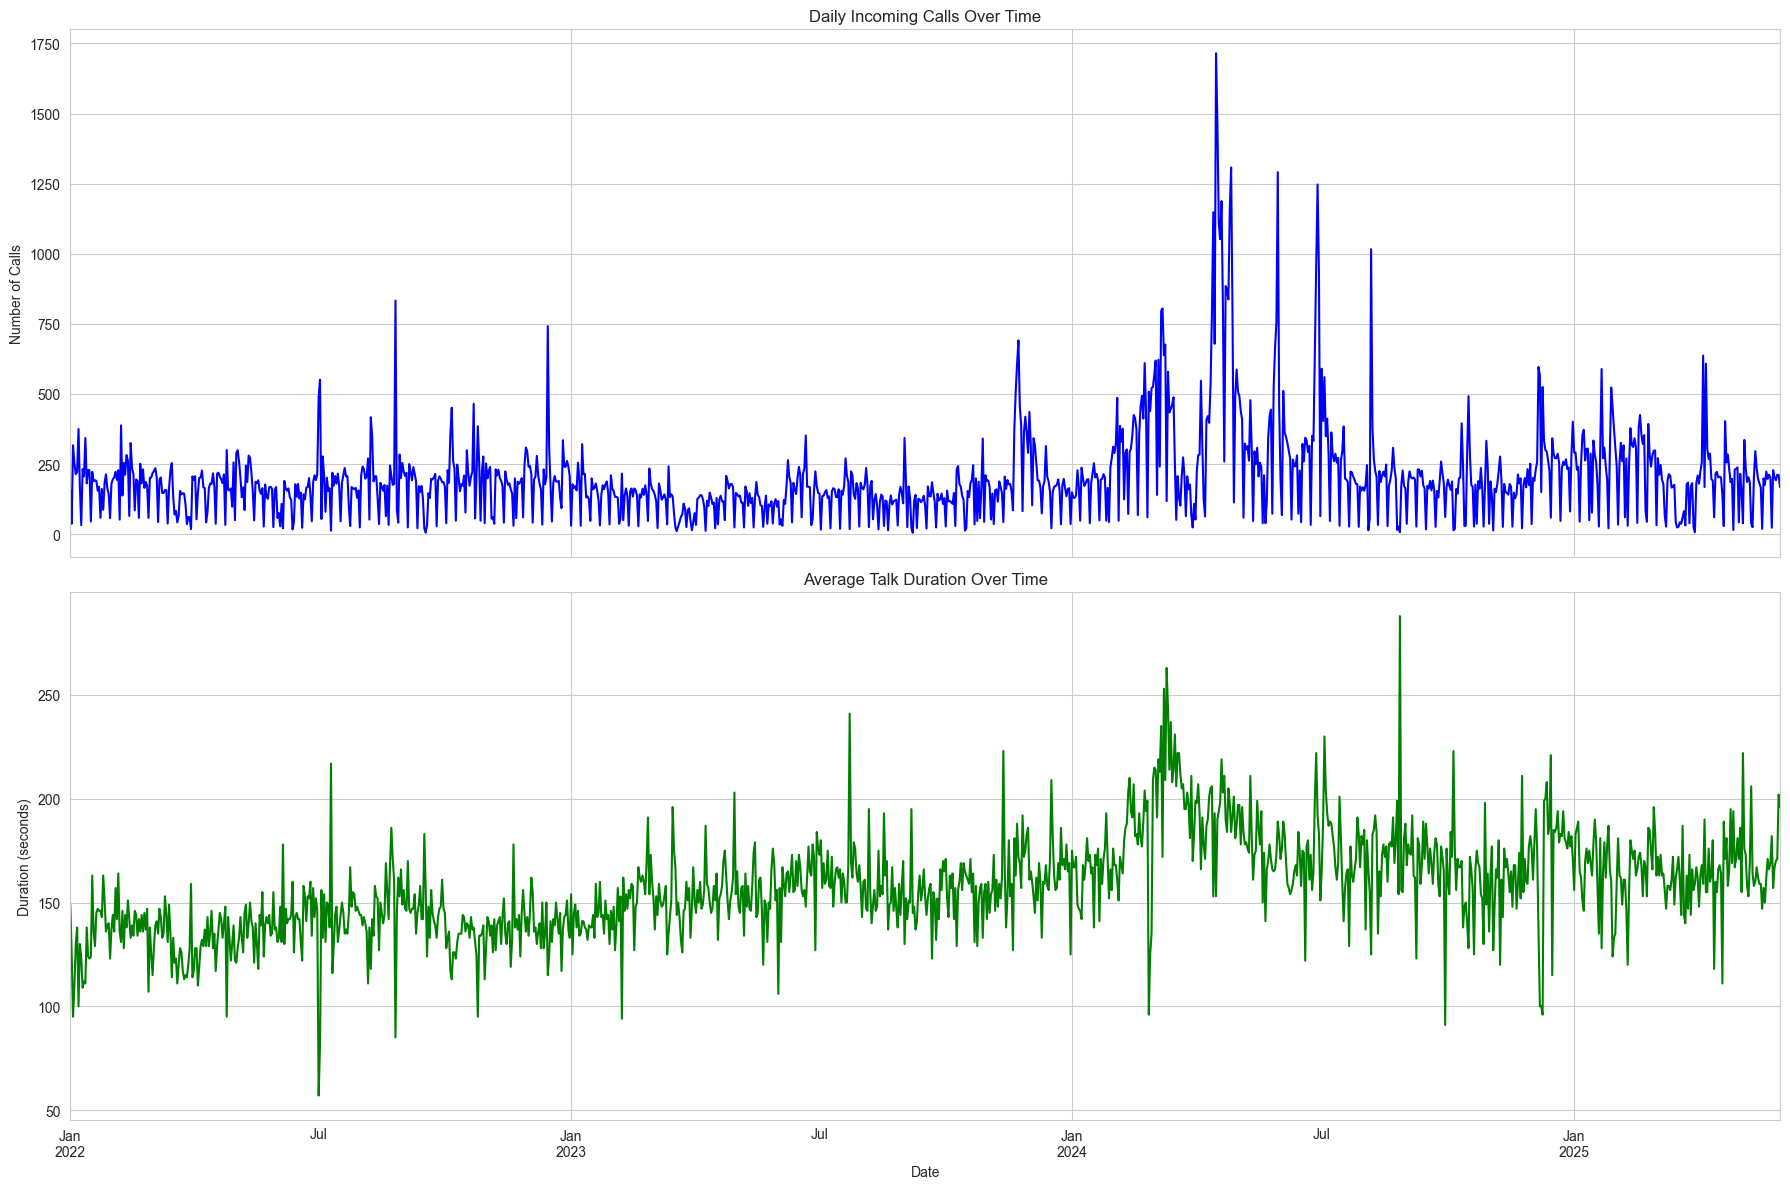

In [13]:
# Create plots to visualize the two target variables over time
fig, axes = plt.subplots(2, 1, figsize=(18, 12), sharex=True)

# Plot Incoming Calls
df["Incoming Calls"].plot(ax=axes[0], title="Daily Incoming Calls Over Time", color="blue")
axes[0].set_ylabel("Number of Calls")

# Plot Average Talk Duration
df["Talk Duration (AVG)"].plot(ax=axes[1], title="Average Talk Duration Over Time", color="green")
axes[1].set_ylabel("Duration (seconds)")


plt.xlabel("Date")
plt.tight_layout()
plt.show()

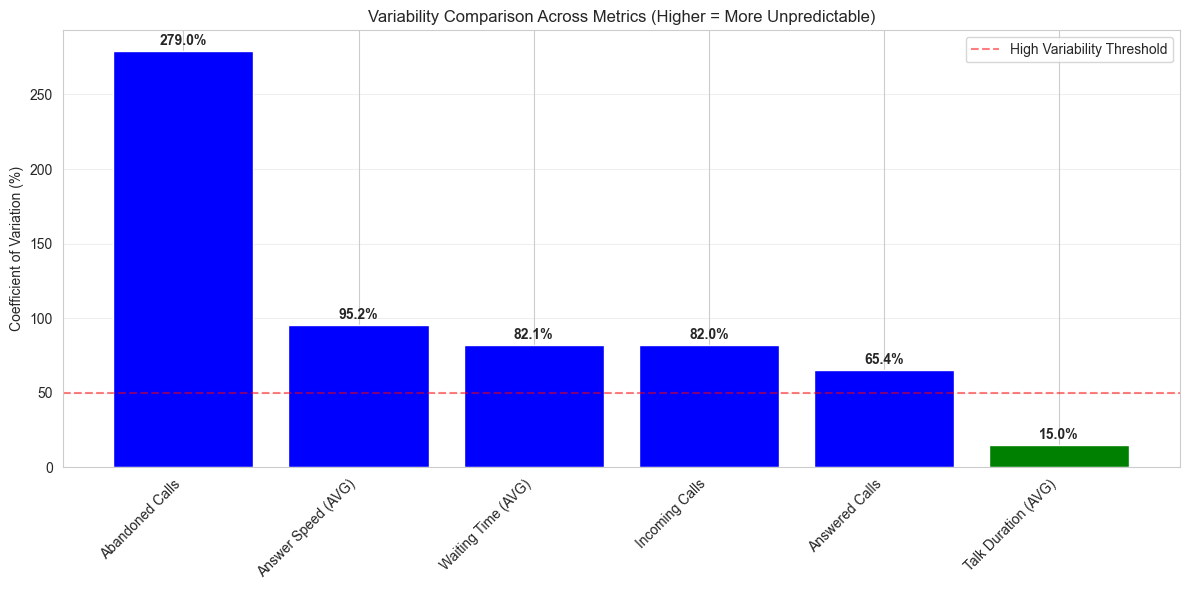

In [17]:
cv_data = []
for col in ["Incoming Calls", "Answered Calls", "Abandoned Calls", "Answer Speed (AVG)", "Talk Duration (AVG)", "Waiting Time (AVG)"]:
    mean_val = df[col].mean()
    std_val = df[col].std()
    cv = (std_val / mean_val) * 100
    cv_data.append({"Metric": col, "CV": cv, "Mean": mean_val, "Std": std_val})

cv_df = pd.DataFrame(cv_data)
cv_df = cv_df.sort_values("CV", ascending=False)

# Visualize
fig, ax = plt.subplots(figsize=(12, 6))
bars = ax.bar(range(len(cv_df)), cv_df["CV"], color=["blue" if x > 50 else "orange" if x >= 30 else "green" for x in cv_df["CV"]])
ax.set_xticks(range(len(cv_df)))
ax.set_xticklabels(cv_df["Metric"], rotation=45, ha="right")
ax.set_ylabel("Coefficient of Variation (%)")
ax.set_title("Variability Comparison Across Metrics (Higher = More Unpredictable)")
ax.axhline(y=50, color="red", linestyle="--", alpha=0.5, label="High Variability Threshold")
ax.legend()
ax.grid(axis="y", alpha=0.3)

for i, (bar, cv) in enumerate(zip(bars, cv_df["CV"])):
    ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2, f"{cv:.1f}%", ha="center", va="bottom", fontweight="bold")

plt.tight_layout()
plt.show()

## 6. Correlation Analysis

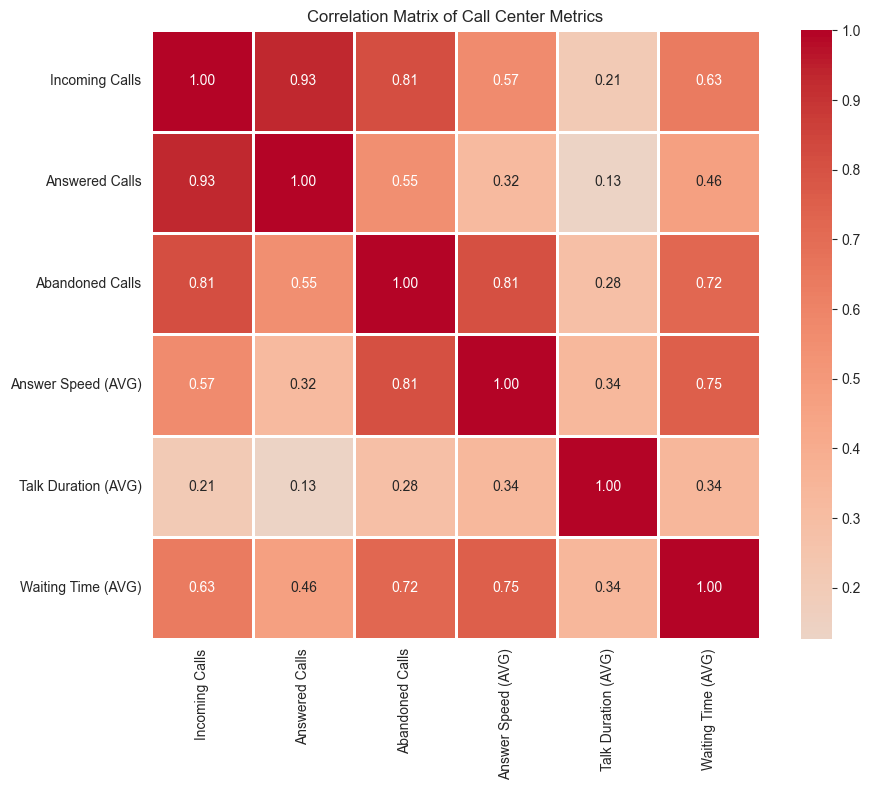


Top Positive Correlations (excluding diagonal):
Answered Calls   Incoming Calls        0.93
Incoming Calls   Answered Calls        0.93
                 Abandoned Calls       0.81
Abandoned Calls  Incoming Calls        0.81
                 Answer Speed (AVG)    0.81
dtype: float64


In [14]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    center=0,
    fmt=".2f",
    square=True,
    linewidths=1,
)
plt.title("Correlation Matrix of Call Center Metrics")
plt.tight_layout()
plt.show()

# Print top correlations
print("\nTop Positive Correlations (excluding diagonal):")
corr_pairs = correlation_matrix.unstack()
sorted_pairs = corr_pairs.sort_values(ascending=False)
# Remove duplicates and self-correlations
top_corrs = sorted_pairs[(sorted_pairs < 1) & (sorted_pairs > 0)].head(5)
print(top_corrs)

Incoming Calls and Answered Calls .93
- when more calls come in, more are answered (obvious)

Incoming Calls and Abandoned Calls .81
- call volumn increases, more calls are abandoned (more demands for our agents)

Abandoned Calls and answer speed .81
higer avg answer speed (longer delay) leads to more abandoned calls

Answer Speed (AVG) to waiting time (avg) .75
- longer calls = higher wait time

Talk Duration (avg)
- how long agents talk dont correlate with the number of incoming calls or answered calls

## 7. Advanced Time Series Decomposition

Time series decomposition helps us understand the underlying patterns in our data by breaking it down into:
- **Trend**: Long-term direction of the data
- **Seasonal**: Regular, recurring patterns
- **Residual**: Random noise or irregular components

In [15]:
# Import additional libraries for time series analysis
import warnings

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, kpss

warnings.filterwarnings("ignore")

### 7.1 Decomposition of Incoming Calls

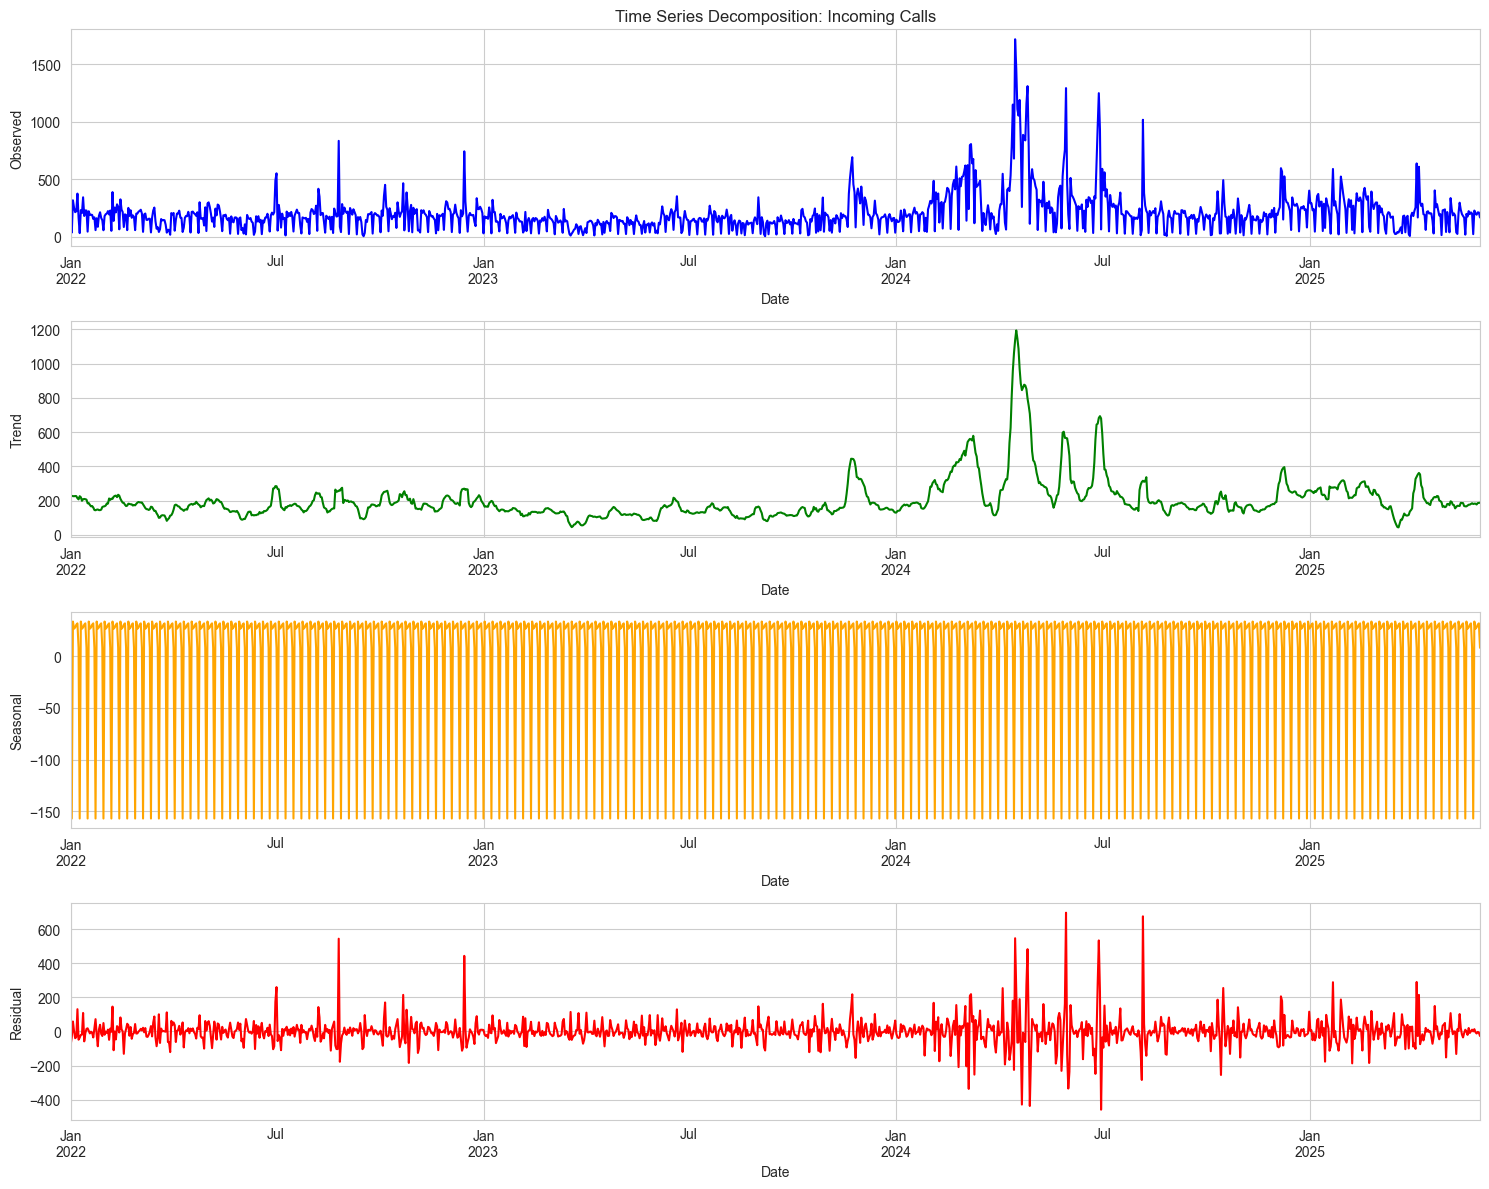

Decomposition Statistics for Incoming Calls:
Trend range: 43.14 to 1193.29
Seasonal range: -156.81 to 33.24
Residual std: 79.48


In [16]:
# Perform seasonal decomposition for Incoming Calls
# Using weekly period (7 days) as we expect weekly patterns
decomposition_calls = seasonal_decompose(df["Incoming Calls"], model="additive", period=7, extrapolate_trend="freq")

# Plot the decomposition
fig, axes = plt.subplots(4, 1, figsize=(15, 12))

# Original data
df["Incoming Calls"].plot(ax=axes[0], color="blue")
axes[0].set_ylabel("Observed")
axes[0].set_title("Time Series Decomposition: Incoming Calls")

# Trend
decomposition_calls.trend.plot(ax=axes[1], color="green")
axes[1].set_ylabel("Trend")

# Seasonal
decomposition_calls.seasonal.plot(ax=axes[2], color="orange")
axes[2].set_ylabel("Seasonal")

# Residual
decomposition_calls.resid.plot(ax=axes[3], color="red")
axes[3].set_ylabel("Residual")

plt.tight_layout()
plt.show()

# Print decomposition statistics
print("Decomposition Statistics for Incoming Calls:")
print(f"Trend range: {decomposition_calls.trend.min():.2f} to {decomposition_calls.trend.max():.2f}")
print(f"Seasonal range: {decomposition_calls.seasonal.min():.2f} to {decomposition_calls.seasonal.max():.2f}")
print(f"Residual std: {decomposition_calls.resid.std():.2f}")

### 7.2 Decomposition of Talk Duration

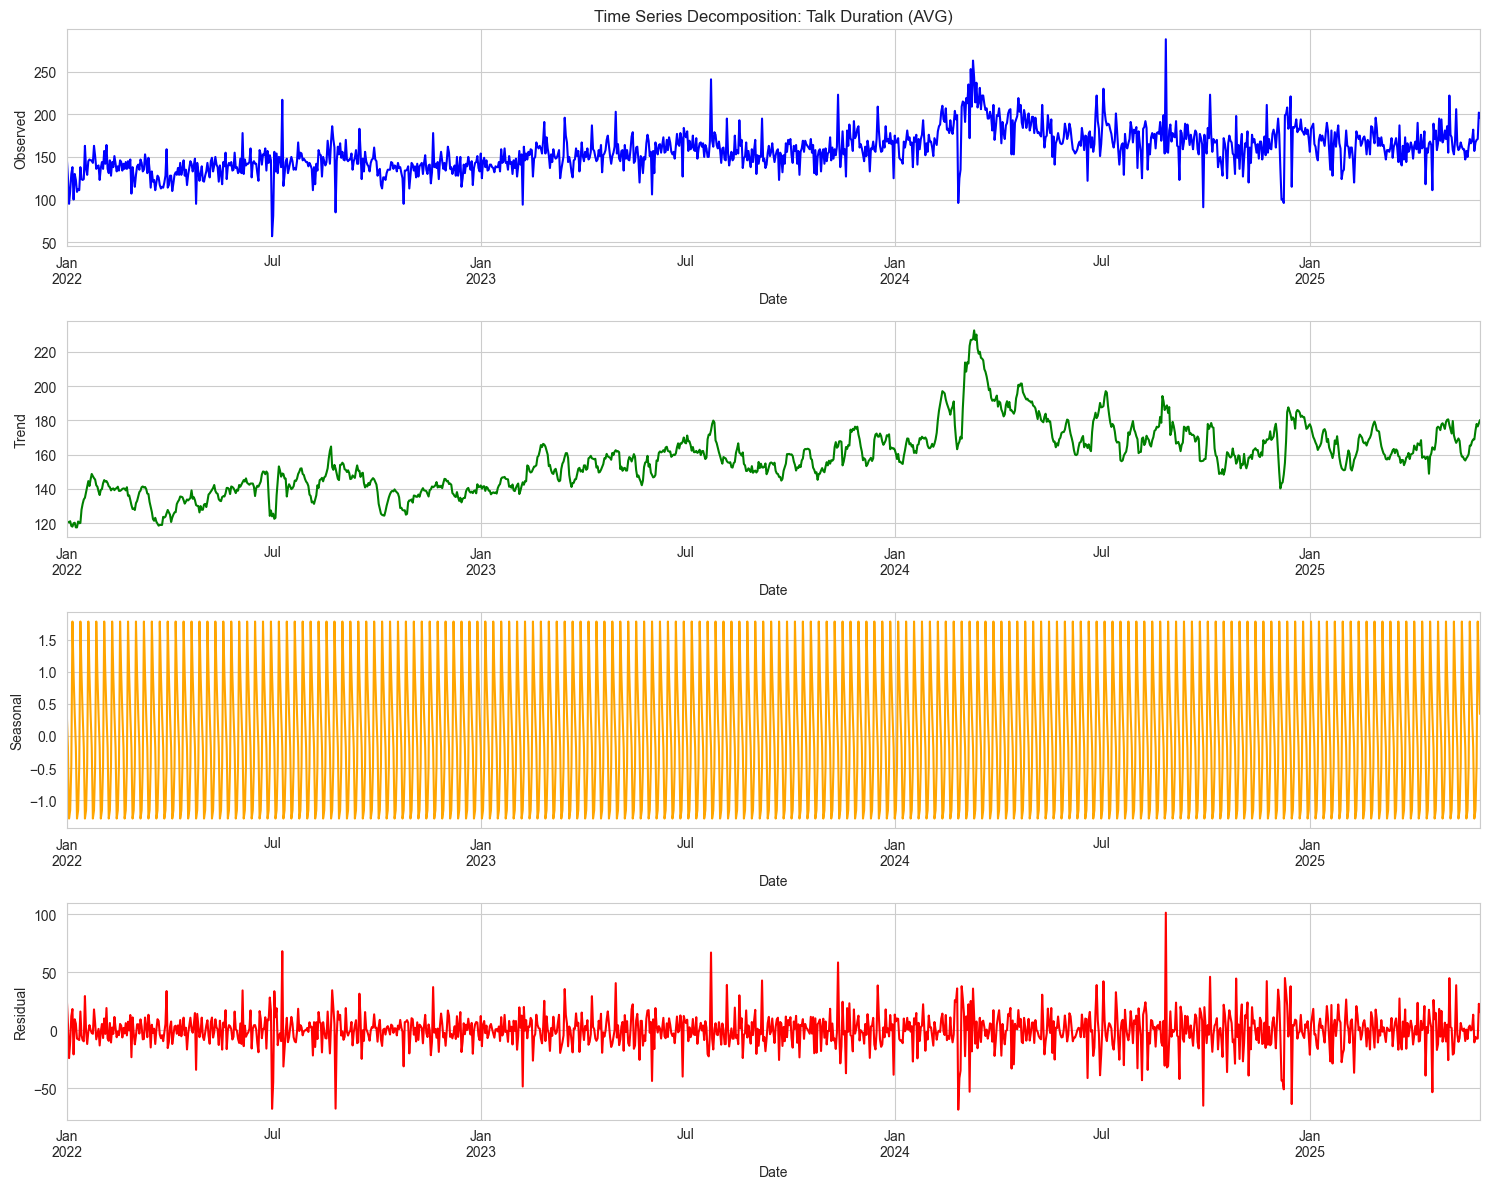

Decomposition Statistics for Talk Duration:
Trend range: 117.57 to 232.43 sec
Seasonal range: -1.29 to 1.78 sec
Residual std: 14.55 sec


In [17]:
# Perform seasonal decomposition for Talk Duration
decomposition_talk = seasonal_decompose(
    df["Talk Duration (AVG)"],
    model="additive",
    period=7,
    extrapolate_trend="freq",
)

# Plot the decomposition
fig, axes = plt.subplots(4, 1, figsize=(15, 12))

# Original data
df["Talk Duration (AVG)"].plot(ax=axes[0], color="blue")
axes[0].set_ylabel("Observed")
axes[0].set_title("Time Series Decomposition: Talk Duration (AVG)")

# Trend
decomposition_talk.trend.plot(ax=axes[1], color="green")
axes[1].set_ylabel("Trend")

# Seasonal
decomposition_talk.seasonal.plot(ax=axes[2], color="orange")
axes[2].set_ylabel("Seasonal")

# Residual
decomposition_talk.resid.plot(ax=axes[3], color="red")
axes[3].set_ylabel("Residual")

plt.tight_layout()
plt.show()

print("Decomposition Statistics for Talk Duration:")

trend_min_t = decomposition_talk.trend.min()
trend_max_t = decomposition_talk.trend.max()
print(f"Trend range: {trend_min_t:.2f} to {trend_max_t:.2f} sec")

seasonal_min_t = decomposition_talk.seasonal.min()
seasonal_max_t = decomposition_talk.seasonal.max()
print(f"Seasonal range: {seasonal_min_t:.2f} to {seasonal_max_t:.2f} sec")

print(f"Residual std: {decomposition_talk.resid.std():.2f} sec")

## 8. Seasonality Analysis

### 8.1 Day of Week Patterns

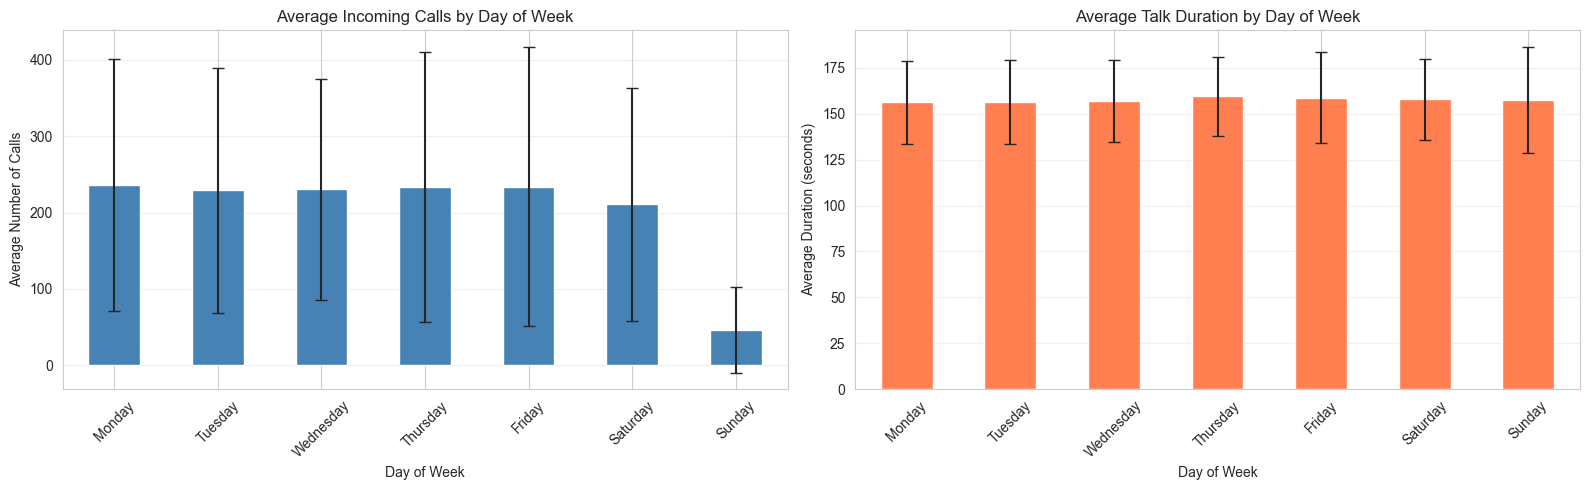

Statistical Summary by Day of Week:

Incoming Calls:
             mean     std
DayName                  
Monday     235.95  164.90
Tuesday    228.91  159.96
Wednesday  230.19  145.28
Thursday   232.84  176.93
Friday     234.05  183.29
Saturday   210.56  152.52
Sunday      45.91   55.89

Talk Duration (seconds):
             mean    std
DayName                 
Monday     156.22  22.78
Tuesday    156.44  22.98
Wednesday  157.18  22.28
Thursday   159.46  21.65
Friday     158.69  24.85
Saturday   157.93  22.06
Sunday     157.31  28.85


In [18]:
# Create day of week features
df["DayOfWeek"] = df.index.dayofweek
df["DayName"] = df.index.day_name()
df["Month"] = df.index.month
df["MonthName"] = df.index.month_name()
df["Quarter"] = df.index.quarter
df["Year"] = df.index.year

# Analyze patterns by day of week
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Incoming Calls by Day of Week
day_order = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]
calls_by_day = df.groupby("DayName")["Incoming Calls"].agg(["mean", "std"]).reindex(day_order)

calls_by_day["mean"].plot(
    kind="bar",
    ax=axes[0],
    color="steelblue",
    yerr=calls_by_day["std"],
    capsize=4,
)
axes[0].set_title("Average Incoming Calls by Day of Week")
axes[0].set_xlabel("Day of Week")
axes[0].set_ylabel("Average Number of Calls")
axes[0].tick_params(axis="x", rotation=45)
axes[0].grid(axis="y", alpha=0.3)

# Talk Duration by Day of Week
talk_by_day = df.groupby("DayName")["Talk Duration (AVG)"].agg(["mean", "std"]).reindex(day_order)

talk_by_day["mean"].plot(kind="bar", ax=axes[1], color="coral", yerr=talk_by_day["std"], capsize=4)
axes[1].set_title("Average Talk Duration by Day of Week")
axes[1].set_xlabel("Day of Week")
axes[1].set_ylabel("Average Duration (seconds)")
axes[1].tick_params(axis="x", rotation=45)
axes[1].grid(axis="y", alpha=0.3)

plt.tight_layout()
plt.show()

print("Statistical Summary by Day of Week:")
print("\nIncoming Calls:")
print(calls_by_day)
print("\nTalk Duration (seconds):")
print(talk_by_day)

### 8.2 Monthly and Quarterly Patterns

### 8.4 Year-over-Year Comparison (2023, 2024, 2025)

Compare seasonal patterns across different years to identify consistent trends and anomalies.

Year-over-Year Data Summary:
2023: 365 days (2023-01-01 to 2023-12-31)
2024: 366 days (2024-01-01 to 2024-12-31)
2025: 151 days (2025-01-01 to 2025-05-31)


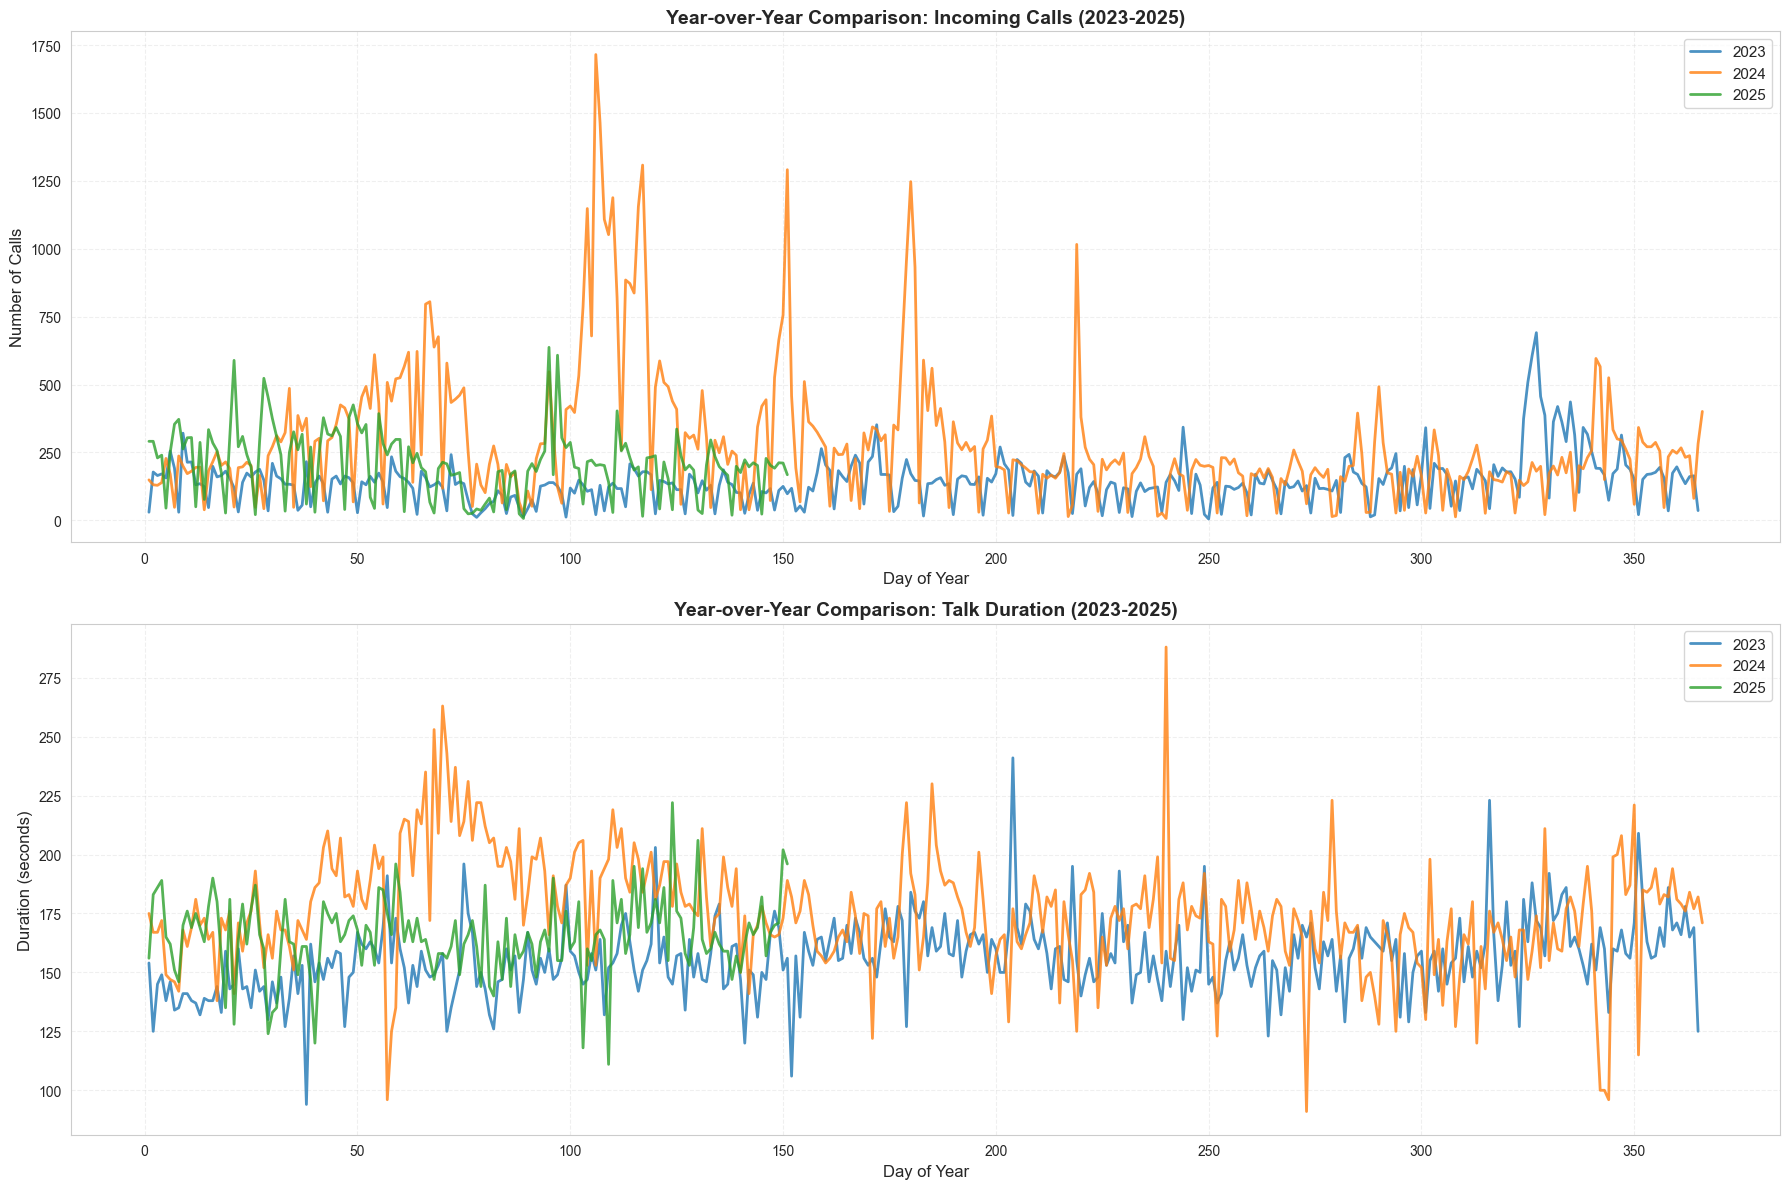

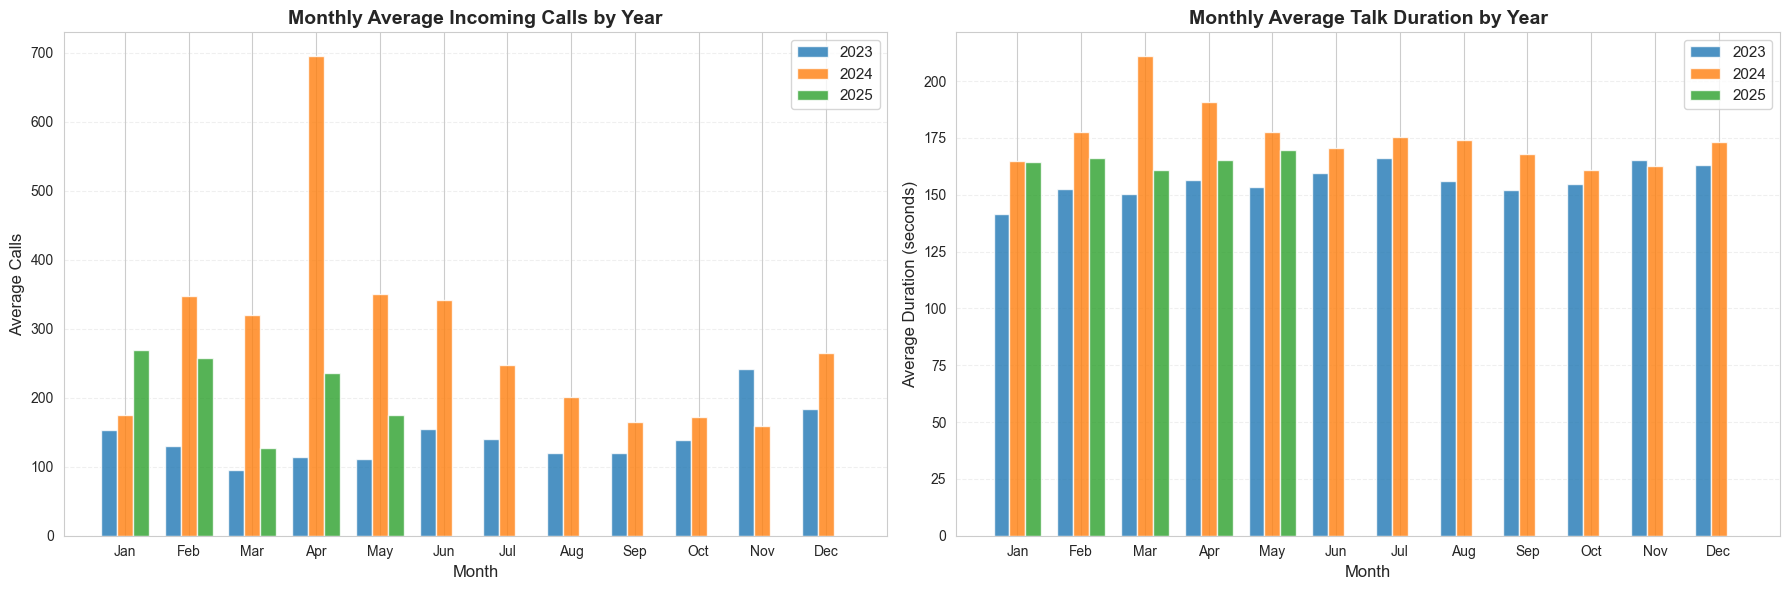

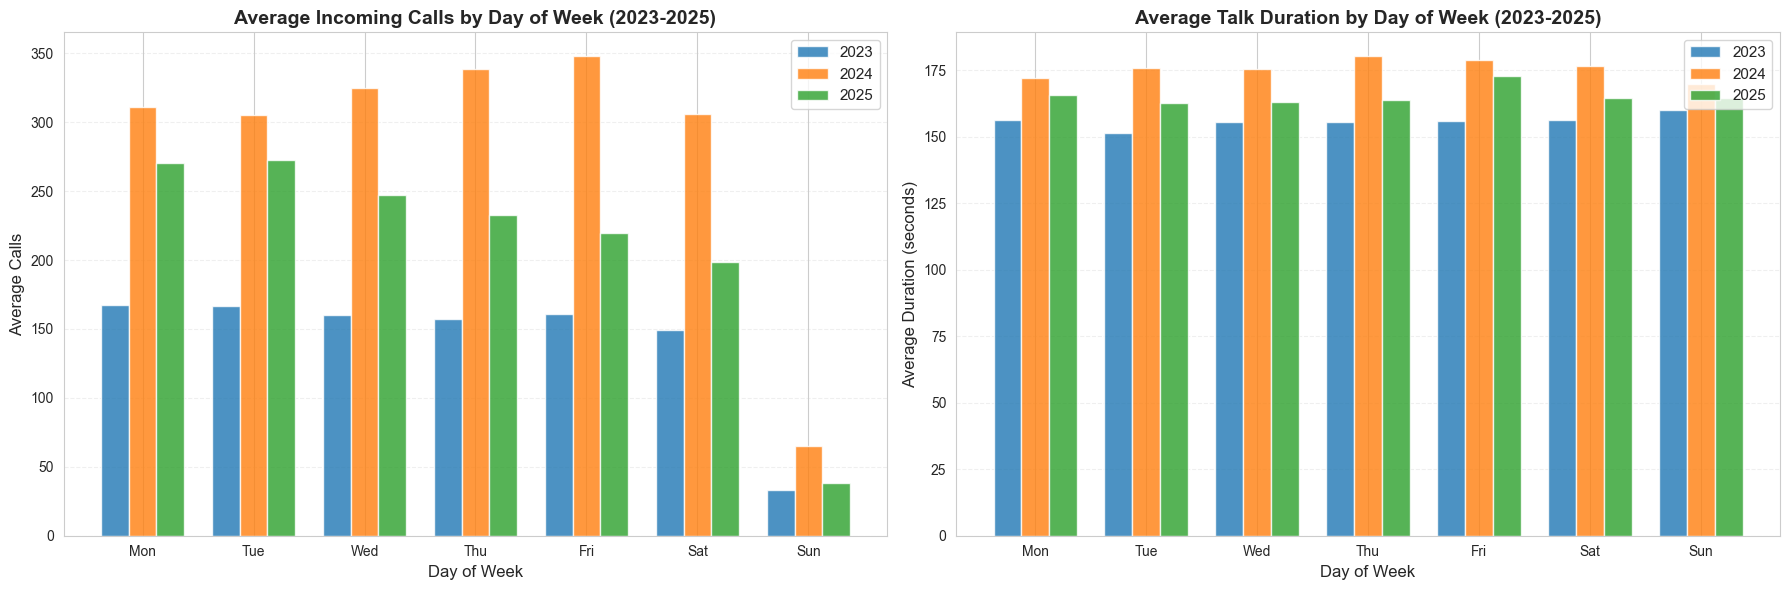


STATISTICAL SUMMARY BY YEAR

  Year  Days  Avg Incoming Calls  Std Incoming Calls  Avg Talk Duration (s)  Std Talk Duration (s)
 2023   365              141.95               86.25                 155.93                  15.75
 2024   366              285.65              245.76                 175.57                  24.49
 2025   151              211.69              122.56                 165.35                  16.30

YEAR-OVER-YEAR GROWTH

Incoming Calls:
  2023 → 2024: +101.23%
  2024 → 2025: -25.89%

Talk Duration:
  2023 → 2024: +12.60%
  2024 → 2025: -5.82%


In [27]:
import numpy as np

# Filter data for specific years
df_2023 = df[df.index.year == 2023].copy()
df_2024 = df[df.index.year == 2024].copy()
df_2025 = df[df.index.year == 2025].copy()

# Add temporal features for each year's data
for df_year in [df_2023, df_2024, df_2025]:
    df_year["DayOfYear"] = df_year.index.dayofyear
    df_year["Month"] = df_year.index.month
    df_year["DayName"] = df_year.index.day_name()

print("Year-over-Year Data Summary:")
print(f"2023: {len(df_2023)} days ({df_2023.index.min().date()} to {df_2023.index.max().date()})")
print(f"2024: {len(df_2024)} days ({df_2024.index.min().date()} to {df_2024.index.max().date()})")
print(f"2025: {len(df_2025)} days ({df_2025.index.min().date()} to {df_2025.index.max().date()})")

# ============================================================
# 1. Line Plot Comparison - Incoming Calls
# ============================================================
fig, axes = plt.subplots(2, 1, figsize=(18, 12))

# Incoming Calls by Day of Year
axes[0].plot(df_2023["DayOfYear"], df_2023["Incoming Calls"], label="2023", color="#1f77b4", linewidth=2, alpha=0.8)
axes[0].plot(df_2024["DayOfYear"], df_2024["Incoming Calls"], label="2024", color="#ff7f0e", linewidth=2, alpha=0.8)
axes[0].plot(df_2025["DayOfYear"], df_2025["Incoming Calls"], label="2025", color="#2ca02c", linewidth=2, alpha=0.8)

axes[0].set_title("Year-over-Year Comparison: Incoming Calls (2023-2025)", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Day of Year", fontsize=12)
axes[0].set_ylabel("Number of Calls", fontsize=12)
axes[0].legend(fontsize=11, loc="best")
axes[0].grid(alpha=0.3, linestyle="--")

# Talk Duration by Day of Year
axes[1].plot(df_2023["DayOfYear"], df_2023["Talk Duration (AVG)"], label="2023", color="#1f77b4", linewidth=2, alpha=0.8)
axes[1].plot(df_2024["DayOfYear"], df_2024["Talk Duration (AVG)"], label="2024", color="#ff7f0e", linewidth=2, alpha=0.8)
axes[1].plot(df_2025["DayOfYear"], df_2025["Talk Duration (AVG)"], label="2025", color="#2ca02c", linewidth=2, alpha=0.8)

axes[1].set_title("Year-over-Year Comparison: Talk Duration (2023-2025)", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Day of Year", fontsize=12)
axes[1].set_ylabel("Duration (seconds)", fontsize=12)
axes[1].legend(fontsize=11, loc="best")
axes[1].grid(alpha=0.3, linestyle="--")

plt.tight_layout()
plt.show()

# ============================================================
# 2. Monthly Average Comparison
# ============================================================
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Incoming Calls - Monthly Average by Year
monthly_calls_2023 = df_2023.groupby("Month")["Incoming Calls"].mean()
monthly_calls_2024 = df_2024.groupby("Month")["Incoming Calls"].mean()
monthly_calls_2025 = df_2025.groupby("Month")["Incoming Calls"].mean()

x = np.arange(1, 13)
width = 0.25

axes[0].bar(x - width, monthly_calls_2023.reindex(range(1, 13), fill_value=0), width, label="2023", color="#1f77b4", alpha=0.8)
axes[0].bar(x, monthly_calls_2024.reindex(range(1, 13), fill_value=0), width, label="2024", color="#ff7f0e", alpha=0.8)
axes[0].bar(x + width, monthly_calls_2025.reindex(range(1, 13), fill_value=0), width, label="2025", color="#2ca02c", alpha=0.8)

axes[0].set_title("Monthly Average Incoming Calls by Year", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Month", fontsize=12)
axes[0].set_ylabel("Average Calls", fontsize=12)
axes[0].set_xticks(x)
axes[0].set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
axes[0].legend(fontsize=11)
axes[0].grid(axis="y", alpha=0.3, linestyle="--")

# Talk Duration - Monthly Average by Year
monthly_talk_2023 = df_2023.groupby("Month")["Talk Duration (AVG)"].mean()
monthly_talk_2024 = df_2024.groupby("Month")["Talk Duration (AVG)"].mean()
monthly_talk_2025 = df_2025.groupby("Month")["Talk Duration (AVG)"].mean()

axes[1].bar(x - width, monthly_talk_2023.reindex(range(1, 13), fill_value=0), width, label="2023", color="#1f77b4", alpha=0.8)
axes[1].bar(x, monthly_talk_2024.reindex(range(1, 13), fill_value=0), width, label="2024", color="#ff7f0e", alpha=0.8)
axes[1].bar(x + width, monthly_talk_2025.reindex(range(1, 13), fill_value=0), width, label="2025", color="#2ca02c", alpha=0.8)

axes[1].set_title("Monthly Average Talk Duration by Year", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Month", fontsize=12)
axes[1].set_ylabel("Average Duration (seconds)", fontsize=12)
axes[1].set_xticks(x)
axes[1].set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"])
axes[1].legend(fontsize=11)
axes[1].grid(axis="y", alpha=0.3, linestyle="--")

plt.tight_layout()
plt.show()

# ============================================================
# 3. Day of Week Comparison Across Years
# ============================================================
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Incoming Calls by Day of Week
dow_calls_2023 = df_2023.groupby("DayName")["Incoming Calls"].mean().reindex(day_order)
dow_calls_2024 = df_2024.groupby("DayName")["Incoming Calls"].mean().reindex(day_order)
dow_calls_2025 = df_2025.groupby("DayName")["Incoming Calls"].mean().reindex(day_order)

x = np.arange(len(day_order))
width = 0.25

axes[0].bar(x - width, dow_calls_2023, width, label="2023", color="#1f77b4", alpha=0.8)
axes[0].bar(x, dow_calls_2024, width, label="2024", color="#ff7f0e", alpha=0.8)
axes[0].bar(x + width, dow_calls_2025, width, label="2025", color="#2ca02c", alpha=0.8)

axes[0].set_title("Average Incoming Calls by Day of Week (2023-2025)", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Day of Week", fontsize=12)
axes[0].set_ylabel("Average Calls", fontsize=12)
axes[0].set_xticks(x)
axes[0].set_xticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
axes[0].legend(fontsize=11)
axes[0].grid(axis="y", alpha=0.3, linestyle="--")

# Talk Duration by Day of Week
dow_talk_2023 = df_2023.groupby("DayName")["Talk Duration (AVG)"].mean().reindex(day_order)
dow_talk_2024 = df_2024.groupby("DayName")["Talk Duration (AVG)"].mean().reindex(day_order)
dow_talk_2025 = df_2025.groupby("DayName")["Talk Duration (AVG)"].mean().reindex(day_order)

axes[1].bar(x - width, dow_talk_2023, width, label="2023", color="#1f77b4", alpha=0.8)
axes[1].bar(x, dow_talk_2024, width, label="2024", color="#ff7f0e", alpha=0.8)
axes[1].bar(x + width, dow_talk_2025, width, label="2025", color="#2ca02c", alpha=0.8)

axes[1].set_title("Average Talk Duration by Day of Week (2023-2025)", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Day of Week", fontsize=12)
axes[1].set_ylabel("Average Duration (seconds)", fontsize=12)
axes[1].set_xticks(x)
axes[1].set_xticklabels(["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
axes[1].legend(fontsize=11)
axes[1].grid(axis="y", alpha=0.3, linestyle="--")

plt.tight_layout()
plt.show()

# ============================================================
# 4. Statistical Summary by Year
# ============================================================
print("\n" + "=" * 80)
print("STATISTICAL SUMMARY BY YEAR")
print("=" * 80)

summary_data = []
for year, df_year in [(2023, df_2023), (2024, df_2024), (2025, df_2025)]:
    summary_data.append(
        {
            "Year": year,
            "Days": len(df_year),
            "Avg Incoming Calls": df_year["Incoming Calls"].mean(),
            "Std Incoming Calls": df_year["Incoming Calls"].std(),
            "Avg Talk Duration (s)": df_year["Talk Duration (AVG)"].mean(),
            "Std Talk Duration (s)": df_year["Talk Duration (AVG)"].std(),
        }
    )

summary_df = pd.DataFrame(summary_data)
print("\n", summary_df.to_string(index=False))

# Calculate Year-over-Year growth
print("\n" + "=" * 80)
print("YEAR-OVER-YEAR GROWTH")
print("=" * 80)
calls_growth_23_24 = (df_2024["Incoming Calls"].mean() - df_2023["Incoming Calls"].mean()) / df_2023["Incoming Calls"].mean() * 100
calls_growth_24_25 = (df_2025["Incoming Calls"].mean() - df_2024["Incoming Calls"].mean()) / df_2024["Incoming Calls"].mean() * 100

talk_growth_23_24 = (df_2024["Talk Duration (AVG)"].mean() - df_2023["Talk Duration (AVG)"].mean()) / df_2023["Talk Duration (AVG)"].mean() * 100
talk_growth_24_25 = (df_2025["Talk Duration (AVG)"].mean() - df_2024["Talk Duration (AVG)"].mean()) / df_2024["Talk Duration (AVG)"].mean() * 100

print("\nIncoming Calls:")
print(f"  2023 → 2024: {calls_growth_23_24:+.2f}%")
print(f"  2024 → 2025: {calls_growth_24_25:+.2f}%")

print("\nTalk Duration:")
print(f"  2023 → 2024: {talk_growth_23_24:+.2f}%")
print(f"  2024 → 2025: {talk_growth_24_25:+.2f}%")

### 8.3 Heatmap: Day of Week vs Month Patterns

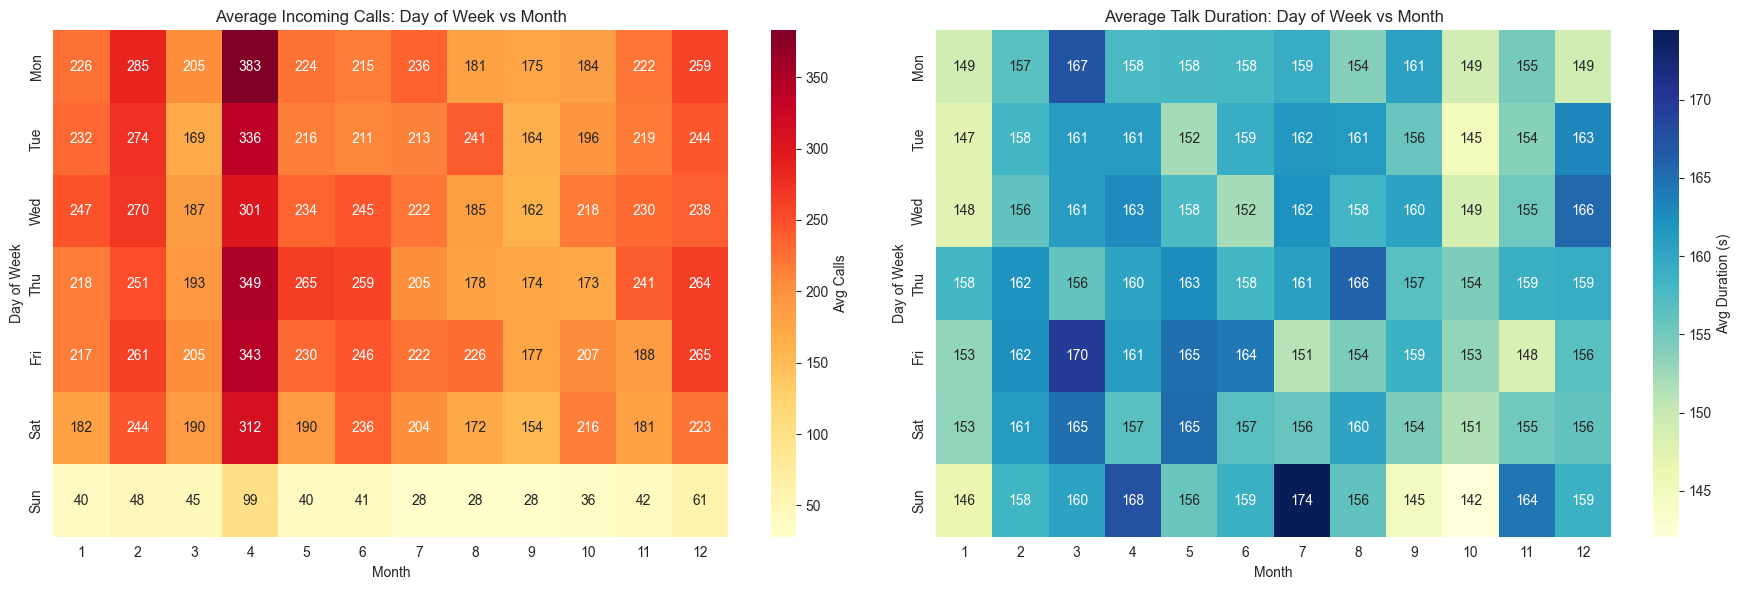

In [21]:
# Create heatmaps to visualize patterns across multiple dimensions
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Heatmap: Incoming Calls by Day of Week and Month
pivot_calls = df.pivot_table(values="Incoming Calls", index="DayOfWeek", columns="Month", aggfunc="mean")
pivot_calls.index = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

sns.heatmap(
    pivot_calls,
    annot=True,
    fmt=".0f",
    cmap="YlOrRd",
    ax=axes[0],
    cbar_kws={"label": "Avg Calls"},
)
axes[0].set_title("Average Incoming Calls: Day of Week vs Month")
axes[0].set_xlabel("Month")
axes[0].set_ylabel("Day of Week")

# Heatmap: Talk Duration by Day of Week and Month
pivot_talk = df.pivot_table(
    values="Talk Duration (AVG)",
    index="DayOfWeek",
    columns="Month",
    aggfunc="mean",
)
pivot_talk.index = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]

sns.heatmap(
    pivot_talk,
    annot=True,
    fmt=".0f",
    cmap="YlGnBu",
    ax=axes[1],
    cbar_kws={"label": "Avg Duration (s)"},
)
axes[1].set_title("Average Talk Duration: Day of Week vs Month")
axes[1].set_xlabel("Month")
axes[1].set_ylabel("Day of Week")

plt.tight_layout()
plt.show()

## 9. Stationarity Testing

Stationarity is crucial for time series modeling. A stationary series has constant mean, variance, and autocorrelation over time.

In [22]:
def test_stationarity(timeseries, title):
    """
    Perform ADF (Augmented Dickey-Fuller) and KPSS tests for stationarity
    """
    print(f"\n{'='*60}")
    print(f"Stationarity Tests for: {title}")
    print("=" * 60)

    # ADF Test
    adf_result = adfuller(timeseries.dropna(), autolag="AIC")
    print("\n--- Augmented Dickey-Fuller Test ---")
    print(f"ADF Statistic: {adf_result[0]:.6f}")
    print(f"p-value: {adf_result[1]:.6f}")
    print("Critical Values:")
    for key, value in adf_result[4].items():
        print(f"\t{key}: {value:.3f}")

    if adf_result[1] <= 0.05:
        print("✓ Result: Series is STATIONARY (reject null hypothesis)")
    else:
        print("✗ Result: Series is NON-STATIONARY " "(fail to reject null hypothesis)")

    # KPSS Test
    kpss_result = kpss(timeseries.dropna(), regression="c", nlags="auto")
    print("\n--- KPSS Test ---")
    print(f"KPSS Statistic: {kpss_result[0]:.6f}")
    print(f"p-value: {kpss_result[1]:.6f}")
    print("Critical Values:")
    for key, value in kpss_result[3].items():
        print(f"\t{key}: {value:.3f}")

    if kpss_result[1] >= 0.05:
        print("✓ Result: Series is STATIONARY " "(fail to reject null hypothesis)")
    else:
        print("✗ Result: Series is NON-STATIONARY " "(reject null hypothesis)")


# Test stationarity for both target variables
test_stationarity(df["Incoming Calls"], "Incoming Calls")
test_stationarity(df["Talk Duration (AVG)"], "Talk Duration (AVG)")


Stationarity Tests for: Incoming Calls

--- Augmented Dickey-Fuller Test ---
ADF Statistic: -5.197227
p-value: 0.000009
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
✓ Result: Series is STATIONARY (reject null hypothesis)

--- KPSS Test ---
KPSS Statistic: 0.913766
p-value: 0.010000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
✗ Result: Series is NON-STATIONARY (reject null hypothesis)

Stationarity Tests for: Talk Duration (AVG)

--- Augmented Dickey-Fuller Test ---
ADF Statistic: -2.632842
p-value: 0.086398
Critical Values:
	1%: -3.436
	5%: -2.864
	10%: -2.568
✗ Result: Series is NON-STATIONARY (fail to reject null hypothesis)

--- KPSS Test ---
KPSS Statistic: 3.978589
p-value: 0.010000
Critical Values:
	10%: 0.347
	5%: 0.463
	2.5%: 0.574
	1%: 0.739
✗ Result: Series is NON-STATIONARY (reject null hypothesis)


## 10. Autocorrelation Analysis (ACF & PACF)

Autocorrelation helps us understand the relationship between a time series and its lagged values, which is essential for model selection.

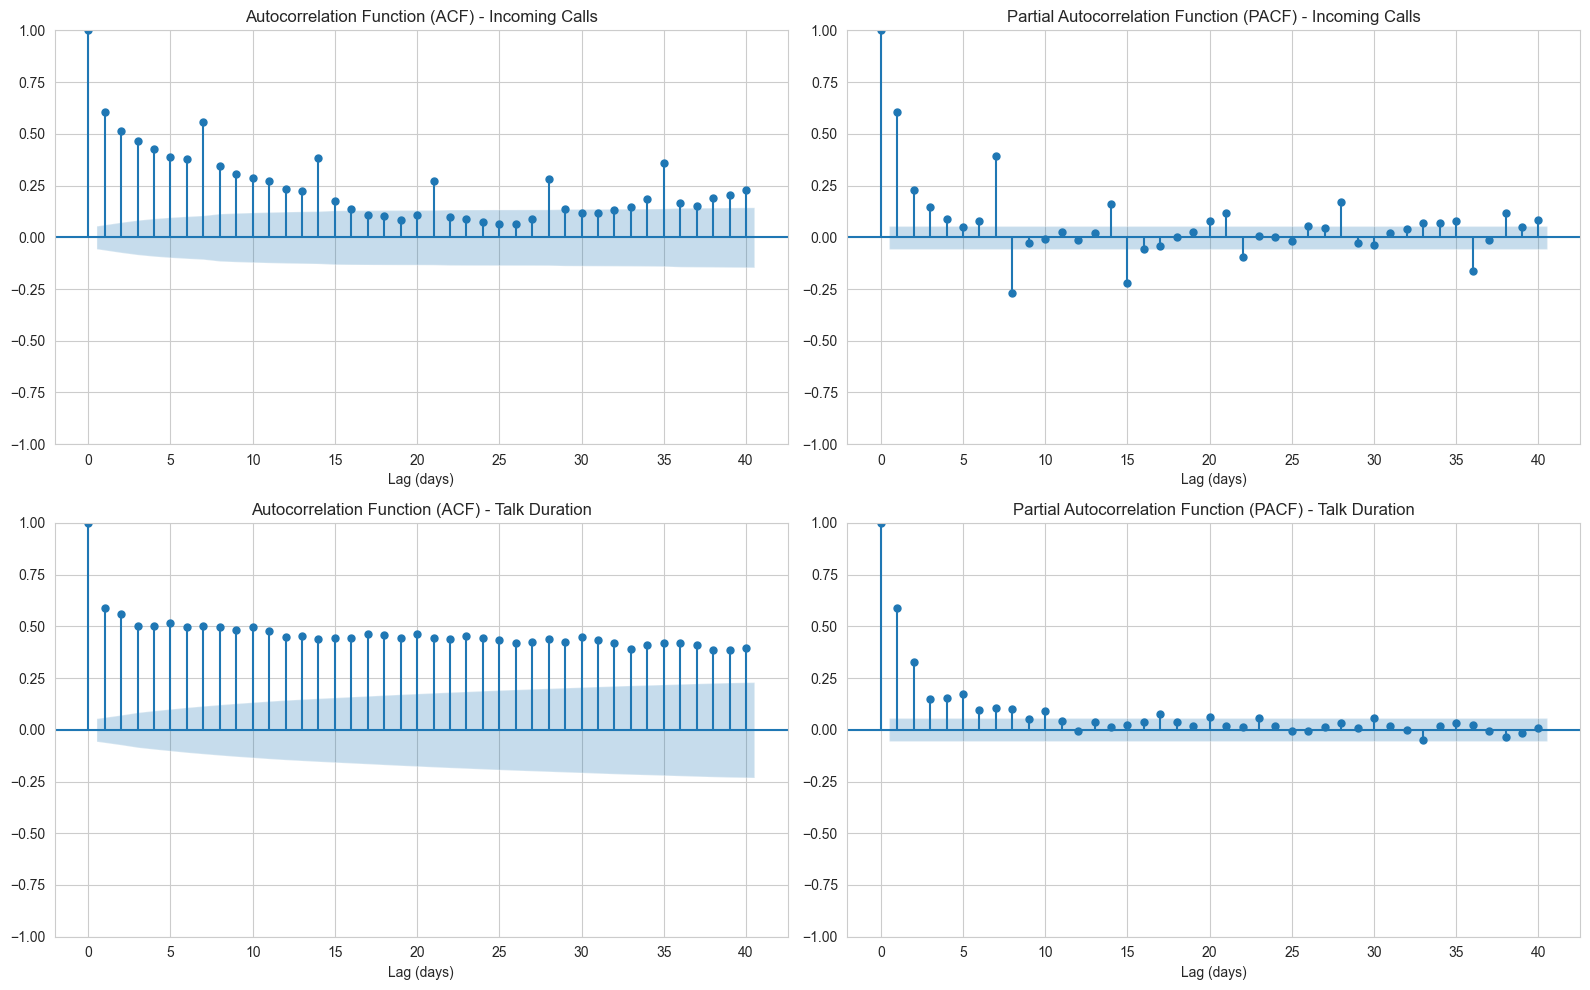

Key Insights from ACF/PACF:
- Significant spikes at lag 7, 14, 21 suggest weekly seasonality
- ACF gradually declining suggests potential trend component
- Use these plots to determine AR and MA parameters for ARIMA models


In [23]:
# ACF and PACF plots for Incoming Calls
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# ACF for Incoming Calls
plot_acf(df["Incoming Calls"].dropna(), lags=40, ax=axes[0, 0])
axes[0, 0].set_title("Autocorrelation Function (ACF) - Incoming Calls")
axes[0, 0].set_xlabel("Lag (days)")

# PACF for Incoming Calls
plot_pacf(df["Incoming Calls"].dropna(), lags=40, ax=axes[0, 1])
axes[0, 1].set_title("Partial Autocorrelation Function (PACF) - Incoming Calls")
axes[0, 1].set_xlabel("Lag (days)")

# ACF for Talk Duration
plot_acf(df["Talk Duration (AVG)"].dropna(), lags=40, ax=axes[1, 0])
axes[1, 0].set_title("Autocorrelation Function (ACF) - Talk Duration")
axes[1, 0].set_xlabel("Lag (days)")

# PACF for Talk Duration
plot_pacf(df["Talk Duration (AVG)"].dropna(), lags=40, ax=axes[1, 1])
axes[1, 1].set_title("Partial Autocorrelation Function (PACF) - Talk Duration")
axes[1, 1].set_xlabel("Lag (days)")

plt.tight_layout()
plt.show()

print("Key Insights from ACF/PACF:")
print("- Significant spikes at lag 7, 14, 21 suggest weekly seasonality")
print("- ACF gradually declining suggests potential trend component")
print("- Use these plots to determine AR and MA parameters for ARIMA models")

## 11. Rolling Statistics Analysis

Visualize how mean and standard deviation change over time using rolling windows.

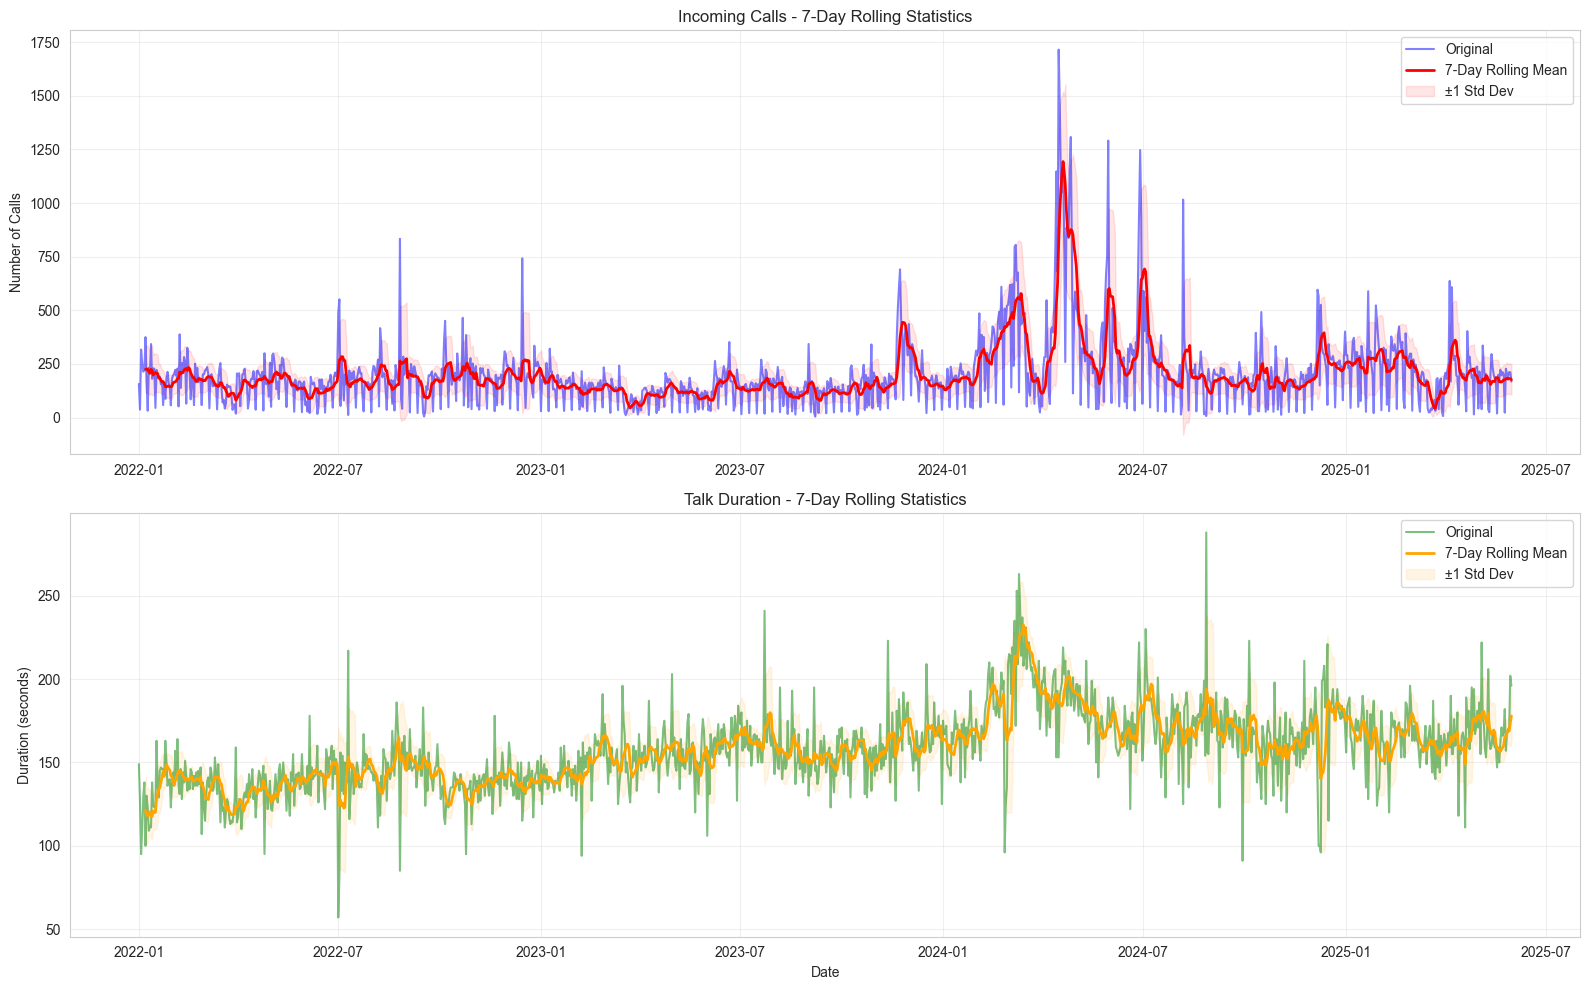

Rolling Statistics Summary:
Window size: 7 days

Incoming Calls - Coefficient of Variation (CV): 0.475
Talk Duration - Coefficient of Variation (CV): 0.089


In [24]:
# Calculate rolling statistics
window_size = 7  # 7-day rolling window

fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Incoming Calls - Rolling Statistics
rolling_mean_calls = df["Incoming Calls"].rolling(window=window_size).mean()
rolling_std_calls = df["Incoming Calls"].rolling(window=window_size).std()

axes[0].plot(df.index, df["Incoming Calls"], color="blue", label="Original", alpha=0.5)
axes[0].plot(
    df.index,
    rolling_mean_calls,
    color="red",
    label=f"{window_size}-Day Rolling Mean",
    linewidth=2,
)
axes[0].fill_between(
    df.index,
    rolling_mean_calls - rolling_std_calls,
    rolling_mean_calls + rolling_std_calls,
    color="red",
    alpha=0.1,
    label="±1 Std Dev",
)
axes[0].set_title(f"Incoming Calls - {window_size}-Day Rolling Statistics")
axes[0].set_ylabel("Number of Calls")
axes[0].legend()
axes[0].grid(alpha=0.3)

# Talk Duration - Rolling Statistics
rolling_mean_talk = df["Talk Duration (AVG)"].rolling(window=window_size).mean()
rolling_std_talk = df["Talk Duration (AVG)"].rolling(window=window_size).std()

axes[1].plot(
    df.index,
    df["Talk Duration (AVG)"],
    color="green",
    label="Original",
    alpha=0.5,
)
axes[1].plot(
    df.index,
    rolling_mean_talk,
    color="orange",
    label=f"{window_size}-Day Rolling Mean",
    linewidth=2,
)
axes[1].fill_between(
    df.index,
    rolling_mean_talk - rolling_std_talk,
    rolling_mean_talk + rolling_std_talk,
    color="orange",
    alpha=0.1,
    label="±1 Std Dev",
)
axes[1].set_title(f"Talk Duration - {window_size}-Day Rolling Statistics")
axes[1].set_ylabel("Duration (seconds)")
axes[1].set_xlabel("Date")
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

cv_calls = rolling_std_calls.mean() / rolling_mean_calls.mean()
cv_talk = rolling_std_talk.mean() / rolling_mean_talk.mean()

print("Rolling Statistics Summary:")
print(f"Window size: {window_size} days")
print(f"\nIncoming Calls - Coefficient of Variation (CV): {cv_calls:.3f}")
print(f"Talk Duration - Coefficient of Variation (CV): {cv_talk:.3f}")